# COMPUTER VISION!
Author: Ashton Doane <br>

This notebook shows the steps that have gone into using computer vision for this project. We namely implemented 4 features:

1. <b>Image capture </b> - Processing images using open-cv and AUKEY camera.
2. <b>Image Filtering</b> - Smoothing out images using filtering methods such as median or gaussian filters.
3. <b>Edge Detection and Processing </b> - Using canny edge detection and radon/hough transform to develop shapes on the map.
4. <b>Thymio Pose Detection</b> - Detecting the location of the Thymio using pattern matching

### 1. Installs for all required elements:

In [1]:
!python3 -m pip install --upgrade tdmclient
!python3 -m pip install --upgrade opencv-python
!python3 -m pip install --upgrade numpy
!python3 -m pip install --upgrade matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.1
    Uninstalling matplotlib-3.9.1:
      Successfully uninstalled matplotlib-3.9.1

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


### 2. Import and Setup

In [1]:
import cv2 # used for image processing
import numpy as np # used for array manipulation in conjuction with
import matplotlib.pyplot as plt # used for displaying processing steps for your aid!

### 3. Thymio Vision Class

In [ ]:
class ThymioVision:
    @staticmethod
    def captureImage():
        """
        Provides the user with a camera feed, from which the user may input 'C' to
        capture the image provided.
        @param cv2 BGR image, from which we extract edges.
        @returns cv2 grayscale image with detected edges from input img.
        """
        cv2.namedWindow("Camera View")
        vc = cv2.VideoCapture(0)
        ret = True
        while True:
            ret, frame = vc.read()
            if not ret:
                break
            cv2.imshow("Camera View", frame)
            key = cv2.waitKey(50)
            if key == ord('c'): # Escape and return image on c
                break
        
        vc.release()
        cv2.destroyAllWindows()
        return frame

    @staticmethod
    def getEdges(img, filter = 'median', edge_method = 'canny', verbose=False):
        """
        Extract detected edges from a provided image.
        @param img(cv2 BGR_image): Image from which we extract edges.
        @param filter (string): Indication of what type of filter to overlay on the image.
        @param edge_method (string): Indication of what type of edge detection method should be used.
        @param verbose (bool): If true, will display each step of the processing.
        @returns cv2 grayscale image with detected edges from input img.
        """
        # First, convert the input image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply the selected filter
        if filter == 'median':
            filtered_img =  cv2.medianBlur(gray_img, 31)
        elif filter == 'average':
            pass
        elif filter == 'gaussian':
            pass
        else:
            filtered_img = gray_img

        #Apply the selected edge detection method to the filtered image
        if edge_method == 'canny':
            edges = cv2.Canny(filtered_img, 100,200)
        else:
            pass

        final_img = np.zeros(shape=edges.shape)
        for i, row in enumerate(edges):
            for j, pixel in enumerate(row):
                if pixel == 255:
                    cv2.circle(final_img, (j,i), 5, 255)

        # If verbose selected, Display images
        if verbose:
            # Set up plot size
            plt.rcParams["figure.figsize"] = (20,5)
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)
            # plt.tick_params(
            #     axis='x',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False
            # )
            # plt.tick_params(
            #     axis='y',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False
            # )
            
            #Grayscaled Image:
            plt.subplot(1, 3, 1)
            plt.title("Grayscale")
            plt.imshow(gray_img, cmap='gray')

            #Filtered Image:
            plt.subplot(1, 3, 2)
            plt.title("Filtered: " + filter)
            plt.imshow(filtered_img, cmap='gray')

            #Edges + expansion radius Image:
            plt.subplot(1, 3, 3)
            plt.title("Edges: " + edge_method)
            plt.imshow(final_img, cmap='gray')

            plt.show()
            
        return edges


    @staticmethod
    def edgesAsCoordinatePairs(edges):
        """
        Returns pairs of coordinates ((x1,y1), (x2,y2)), indicating an edge between those to edges. Uses the hough transform.
        @param edges (np.array): A grayscale image representing extracted edges (0 for empty, 255 for edge)
        @returns A numpy array of form [[(xn,y1), (x2,y2)], ...] representing edges with two lines.
        """
        # Begin by performing the Hough transform on the edges.
        # If verbose, display each step of processing

        pass

    @staticmethod
    def getThymioPose(frame, verbose = False):
        """
        Extracts the Thymio pose from a camera feed and returns as a triple of (x,y,theta), relative to the top-left corner of the camera.
        @param frame (np.array): BGR cv2 image to extract position from.
        @returns 
        """

        # Create a mask that looks for only the light indicator for position
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #convert to hsv for masking
        lower_orange = np.array([0, 0, 200]) 
        upper_orange = np.array([0, 0, 255]) 
        mask = cv2.inRange(hsv, lower_orange, upper_orange) 
        result = cv2.bitwise_and(frame, frame, mask=mask) # image corrcecting

        thymioX = 0
        thymioY = 0
        numDataPoints = 0
        for i, row in enumerate(result):
            for j, pixel in enumerate(row):
                if pixel.any() != 0:
                    thymioX += j
                    thymioY += i
                    numDataPoints += 1

        thymioX = int(thymioX/numDataPoints)
        thymioY = int(thymioY/numDataPoints)
        
        # If verbose, display each step of processing
        if verbose:
            pass
        pass

        cv2.circle(result, )        
        cv2.imshow('frame', result)
        cv2.waitKey(0)

        return (thymioX, thymioY, None)

### 4. Applying this class

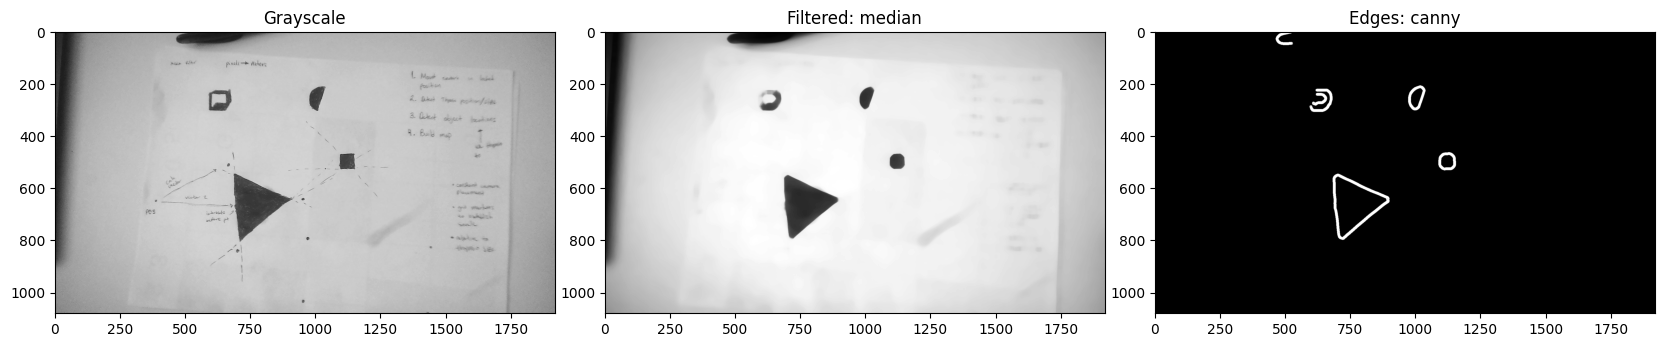

In [ ]:
frame = ThymioVision.captureImage()
img = ThymioVision.getEdges(frame, verbose=True)

In [5]:
# We next take these edges and convert them into coordinate pairs. This greatly reduces the space complexity required to store these edges,
# and also ensures closure of each object.

In [34]:
# Test template matching
frame = ThymioVision.captureImage()

In [43]:
ThymioVision.getThymioPose(frame)

(958, 795, None)